In [1]:
# Automatically reload modules after executing each cell.
%load_ext autoreload
%autoreload 2

In [2]:
# General imports
import os
import tensorflow as tf
from scipy import stats

# Utility imports
from utils.losses import *
from utils.plotting import *
from utils.training import *

np.random.seed(666) # Need to do more to ensure data is the same across runs.

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-07-25 12:50:57.090413: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-07-25 12:50:57.115936: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-07-25 12:50:57.116129: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-07-25 12:50:57.117553: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-07-25 12:50:57.119187: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-07-25 12:50:57.119391: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2

# Scratch

## Test 0

In [ ]:
num = 0
reps = 100
N = 10**6

mu = np.array([0.1, 0])
sg = np.eye(2)

bkgd = stats.multivariate_normal(-mu, sg)
sgnl = stats.multivariate_normal(mu, sg)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

## Test 1

In [ ]:
num = 1
reps = 100
N = 10**6

b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])
sg = 2*np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg)
sgnl = stats.multivariate_normal(mu_sgnl, sg)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

## Test 2

In [ ]:
num = 2
reps = 100
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

## Test 3

In [ ]:
num = 3
reps = 100
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

## Test 4

In [ ]:
num = 4
reps = 100
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

# Performance

In [147]:
reps = 100

bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

In [148]:
g = np.meshgrid(np.linspace(-2, 2, 401), np.linspace(-2, 2, 401))
g = np.append(g[0].reshape(-1,1), g[1].reshape(-1,1), axis = 1)

In [149]:
x = np.linspace(-2, 2, 4001)
y = np.linspace(-2, 2, 4001)
xx, yy = np.meshgrid(x, y)

pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy

## Test 0

### Load

In [150]:
num = 0
N = 10**6

mu = np.array([0.1, 0])
sg = np.eye(2)

bkgd = stats.multivariate_normal(-mu, sg)
sgnl = stats.multivariate_normal(mu, sg)

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

### Visualize Distribution

In [151]:
mu = np.array([0.1, 0])
sg = np.eye(2)

bkgd = stats.multivariate_normal(-mu, sg)
sgnl = stats.multivariate_normal(mu, sg)

In [152]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [153]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

(0.99965645, 0.99987085)

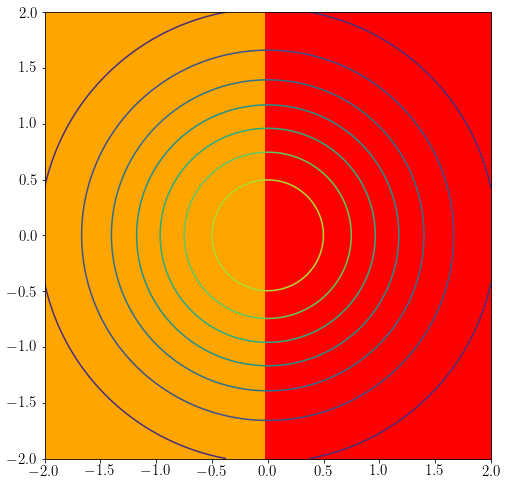

In [154]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### Error

In [155]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

MAEs
BCE:	 0.010563865898762197
MSE:	 0.010748478202371785
MLC:	 0.010745682558990673
SQR:	 0.010426753349918414


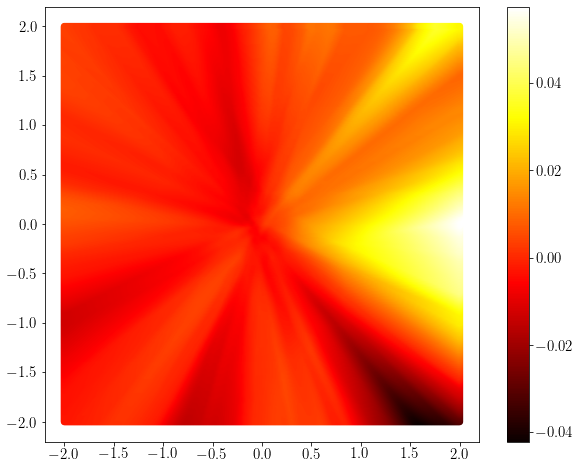

In [156]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

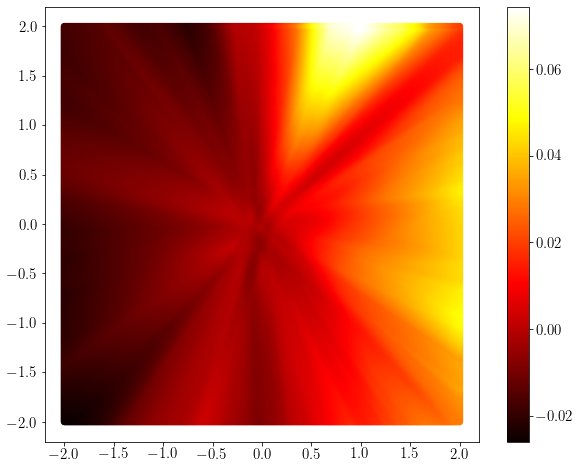

In [157]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

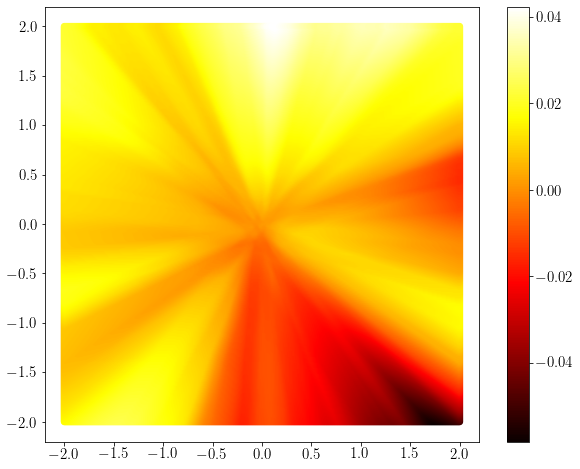

In [158]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

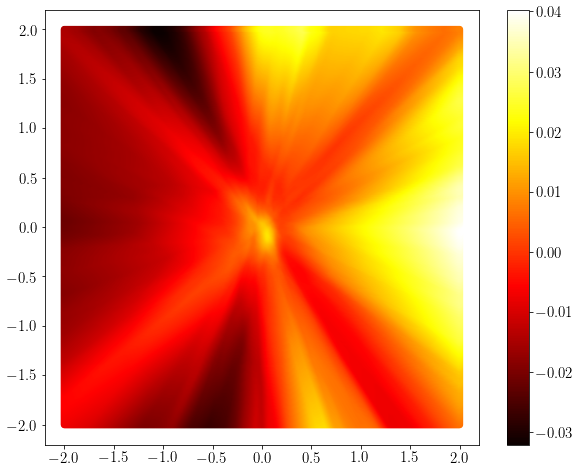

In [159]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 1

### Load

In [160]:
# Test 1
b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])

bkgd = stats.multivariate_normal(mu_bkgd, sg)
sgnl = stats.multivariate_normal(mu_sgnl, sg)

num = 1

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl) 
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

### Visualize Distribution

In [161]:
b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])

bkgd = stats.multivariate_normal(mu_bkgd, sg)
sgnl = stats.multivariate_normal(mu_sgnl, sg)

In [162]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [163]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

(0.99965695, 0.99986925)

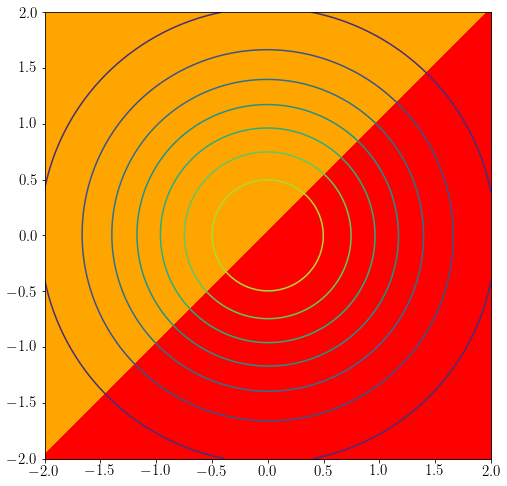

In [164]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### Error

In [165]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

MAEs
BCE:	 0.053148701550099584
MSE:	 0.05373710510839052
MLC:	 0.05363907163332987
SQR:	 0.053376903390878014


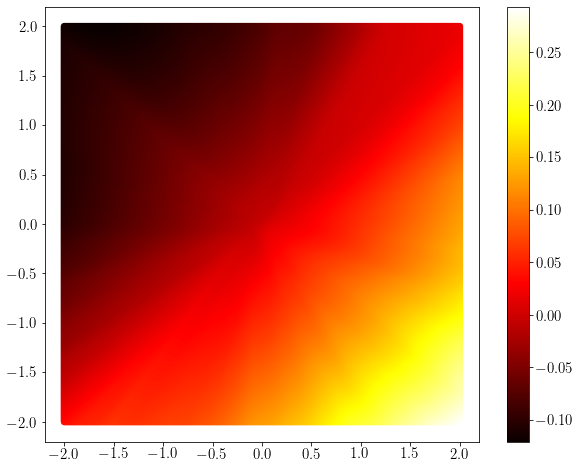

In [166]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

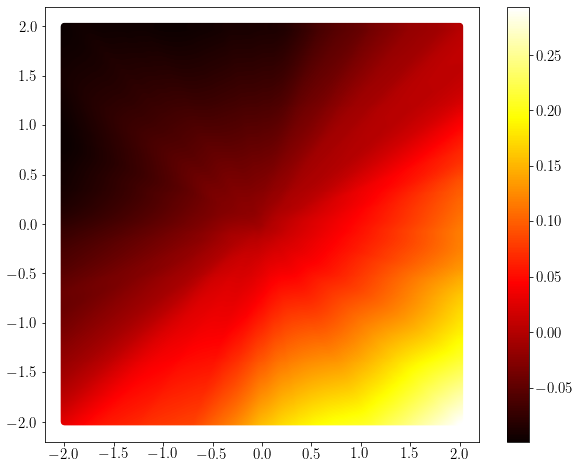

In [167]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

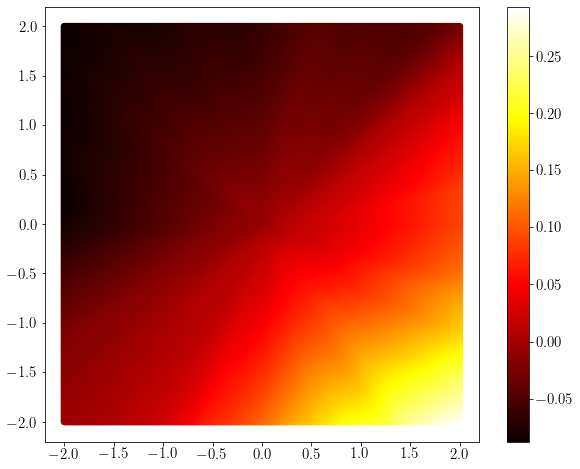

In [168]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

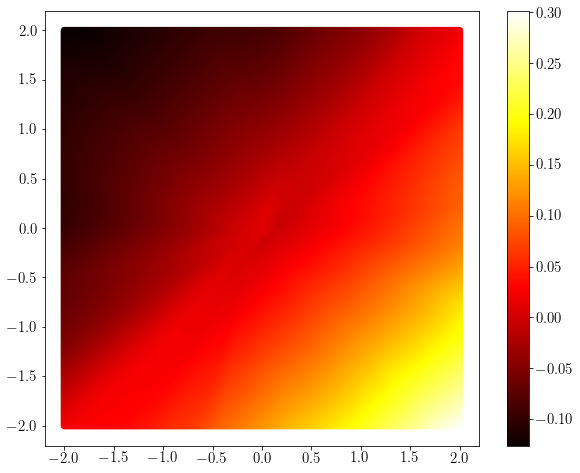

In [169]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 2

### Load

In [170]:
# Test 2
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 2

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl) 
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

### Visualize Distribution

In [171]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

In [172]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [173]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

(0.99057175, 0.99520185)

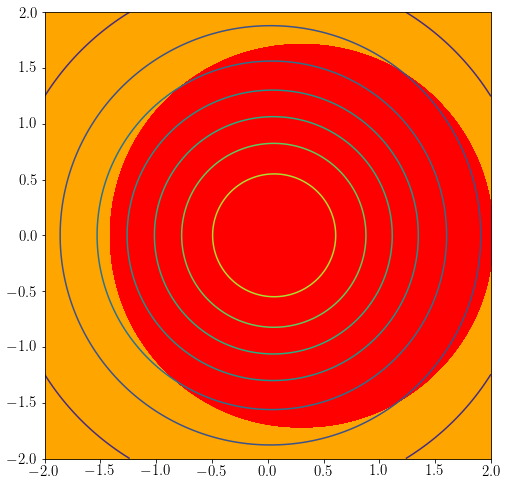

In [174]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### Error

In [175]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

MAEs
BCE:	 0.1534881077708764
MSE:	 0.1603396481036819
MLC:	 0.15602273646733494
SQR:	 0.1529764023895681


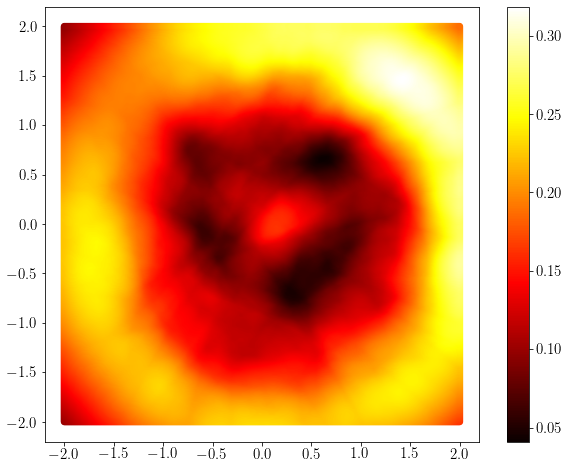

In [176]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

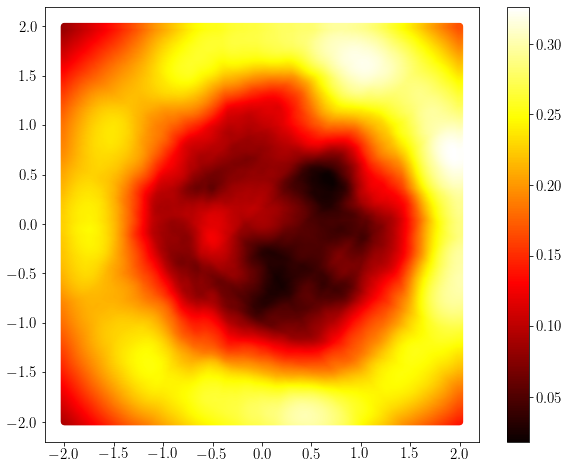

In [177]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

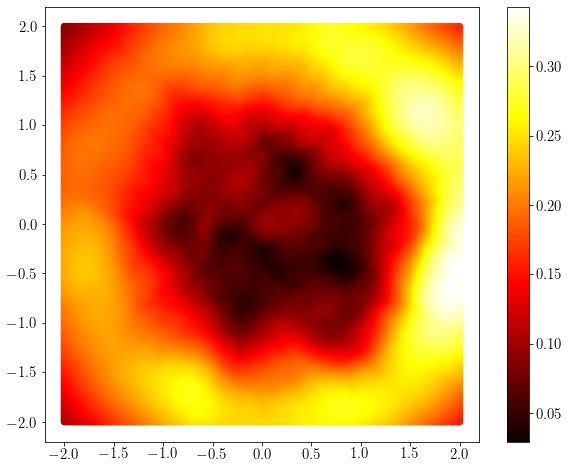

In [178]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

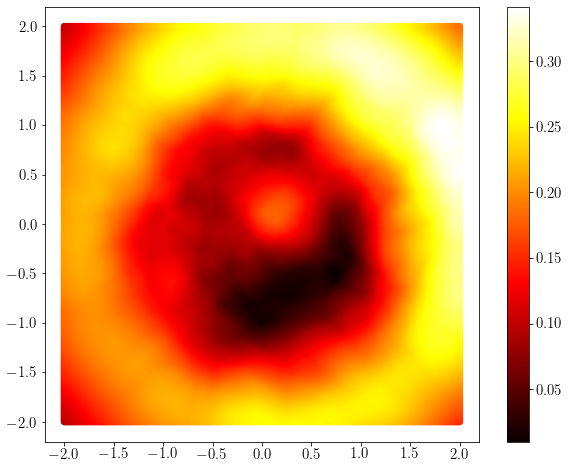

In [179]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 3

### Load

In [180]:
# Test 3
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 3

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

### Visualize Distribution

In [181]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

In [182]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [183]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

(0.99279505, 0.9951956)

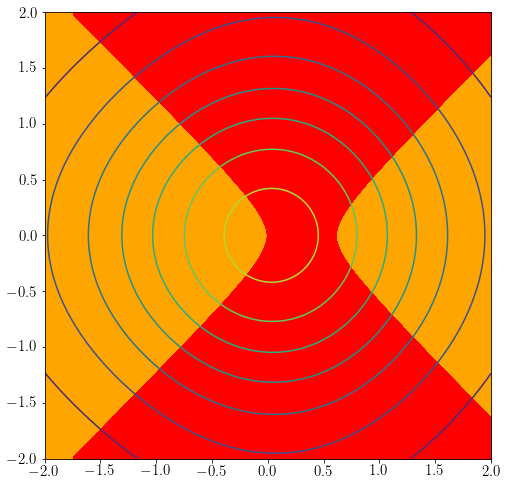

In [184]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### Error

In [185]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

MAEs
BCE:	 0.8574222934143795
MSE:	 0.8478091273575017
MLC:	 1.1765370802313553
SQR:	 0.9028472443039598


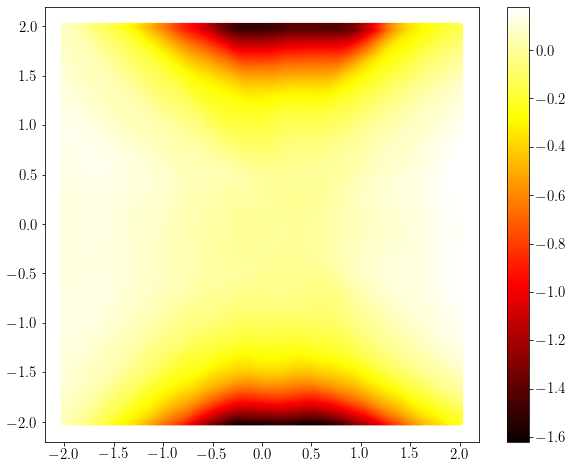

In [186]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

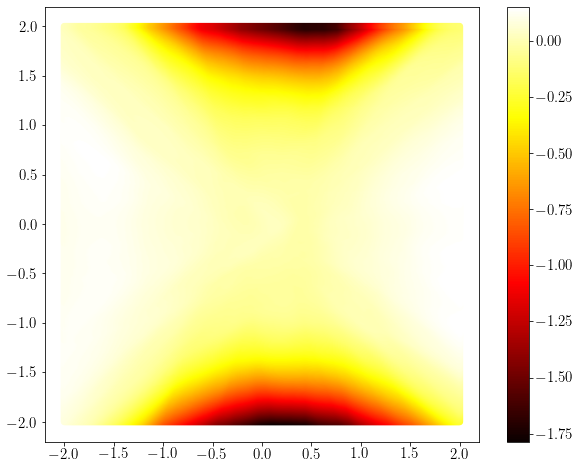

In [187]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

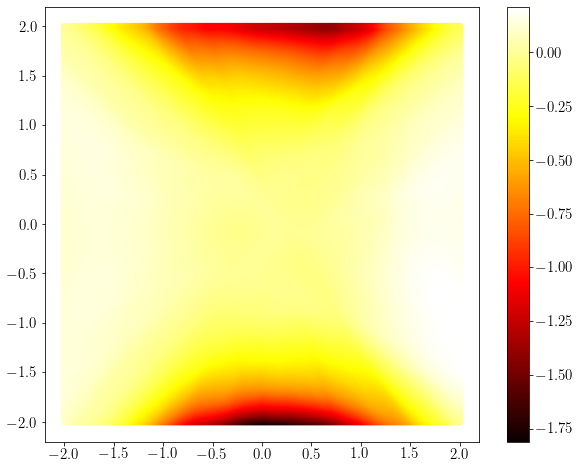

In [188]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

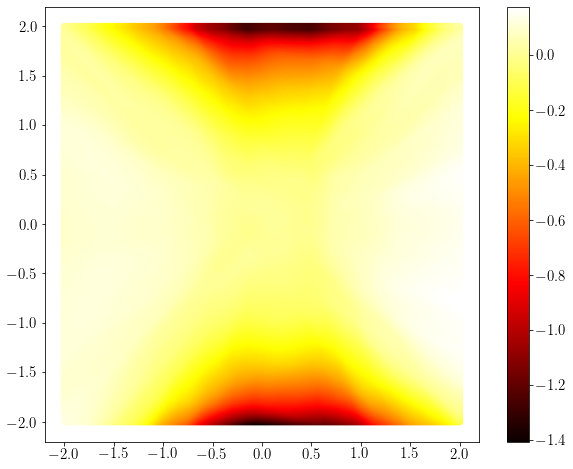

In [189]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 4

### Load

In [190]:
# Test 4

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 4

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl) 
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

### Visualize Distribution

In [191]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

In [192]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [193]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

(0.99222945, 0.9951786)

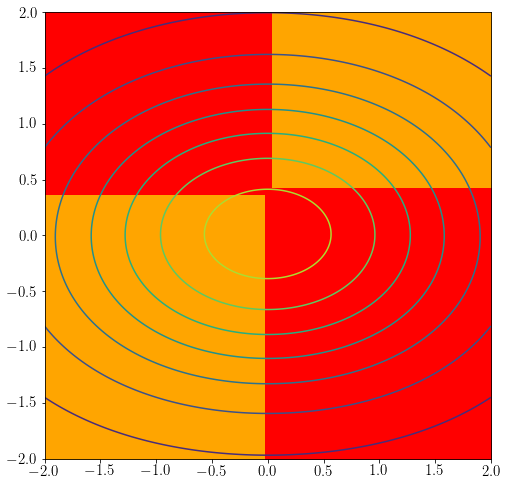

In [194]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### Error

In [195]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

MAEs
BCE:	 0.10897663541766298
MSE:	 0.10904842956750435
MLC:	 0.11579568606629197
SQR:	 0.11112552762260888


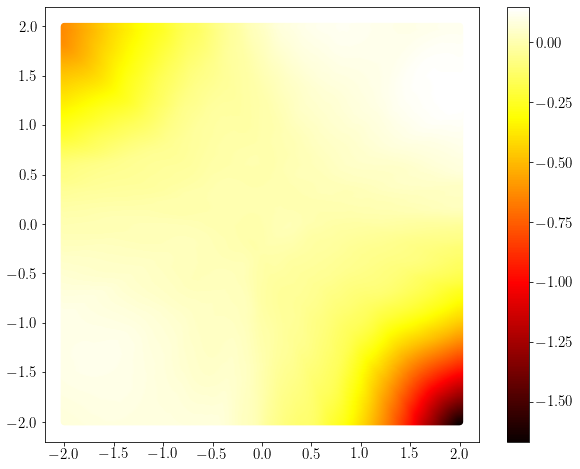

In [196]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

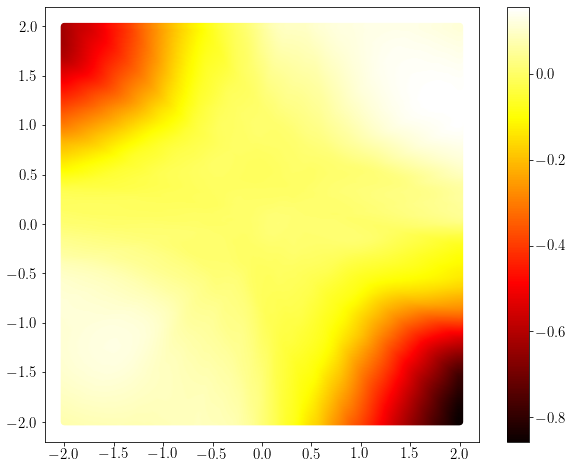

In [197]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

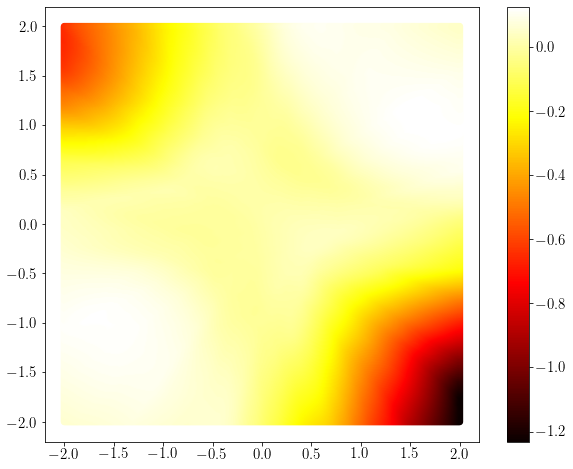

In [198]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

In [205]:
X, Y = np.meshgrid(np.linspace(-2, 2, 401), np.linspace(-2, 2, 401))

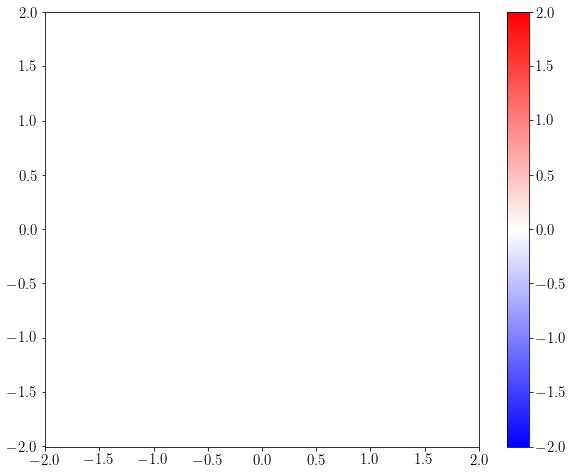

In [221]:
plt.figure(figsize = (10, 8))
aa = g[:, 0].reshape(401, 401)
bb = g[:, 0].reshape(401, 401)
dd = diffs.reshape(401, 401)
plt.pcolor(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -2, vmax = 2)
plt.colorbar()
plt.gca().set_aspect('equal')

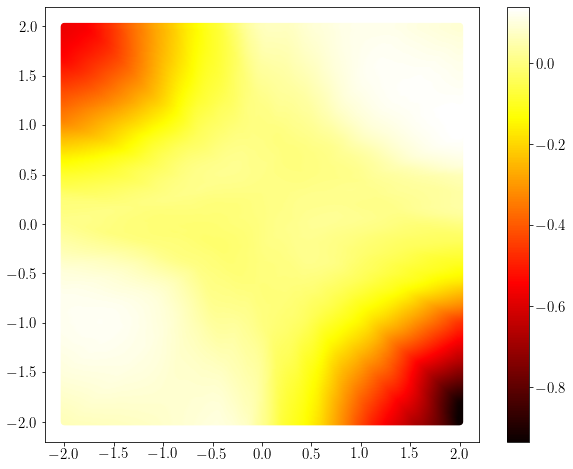

In [201]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs, cmap = 'hot')
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')